In [1]:
from helper_functions import *
PLOT_PATH_20newsgroup = os.path.abspath(os.path.join(PLOT_PATH, "newsgroup"))

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
dataset = fetch_20newsgroups(subset='all',shuffle=True, random_state=42)
vectorizer = CountVectorizer(min_df=5, stop_words='english')
word_doc_matrix = vectorizer.fit_transform(dataset.data)
targets = dataset.target

In [4]:
save_object(word_doc_matrix, "word_doc_matrix.pkl")
save_object(targets, "word_doc_targets.pkl")

In [7]:
word_doc_matrix = load_object("word_doc_matrix.pkl")
targets = load_object("word_doc_targets.pkl")

In [3]:
# the following computation may take several minutes
hellinger_dists = hellinger_distance_matrix_vectorized_sparse(word_doc_matrix)
save_object(hellinger_dists, "hellinger_dists.pkl")

In [11]:
hellinger_dists = load_object("hellinger_dists.pkl")

In [10]:
from cluster_algos import linkage_cluster
kwargs = {'cluster_algo_kwargs': {'clusternumber' : 20}}

In [11]:
optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = run_isumap_cluster(hellinger_dists, targets, datasetName="20newsgroups", dataIsGeodesicDistMatrix=False, dataIsDistMatrix=True, saveDistMatrix=True,cluster_algo=linkage_cluster,**kwargs)
# optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = run_isumap_cluster(D, targets, datasetName="20newsgroups", dataIsGeodesicDistMatrix=True, dataIsDistMatrix=True, saveDistMatrix=True,cluster_algo=linkage_cluster,**kwargs)

Number of CPU threads =  144
Using geodesic distance matrix
Number of clusters:  20

Performing classical MDS...

classical MDS: 20.17 sec

Starting cluster separation optimization...
Optimizing separation for 20 clusters...
Total parameters: 60
Iteration 0, Loss: 618.719482
Iteration 10, Loss: 7.806730
Iteration 20, Loss: 0.795981
Iteration 30, Loss: 0.014599
Iteration 40, Loss: 0.008443
Iteration 50, Loss: 0.006120
Iteration 60, Loss: 0.004647
Iteration 70, Loss: 0.003772
Iteration 80, Loss: 0.003055
Converged at iteration 87

Isumap total time: 11.37 min


In [35]:
optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = load_my_object("20newsgroups")

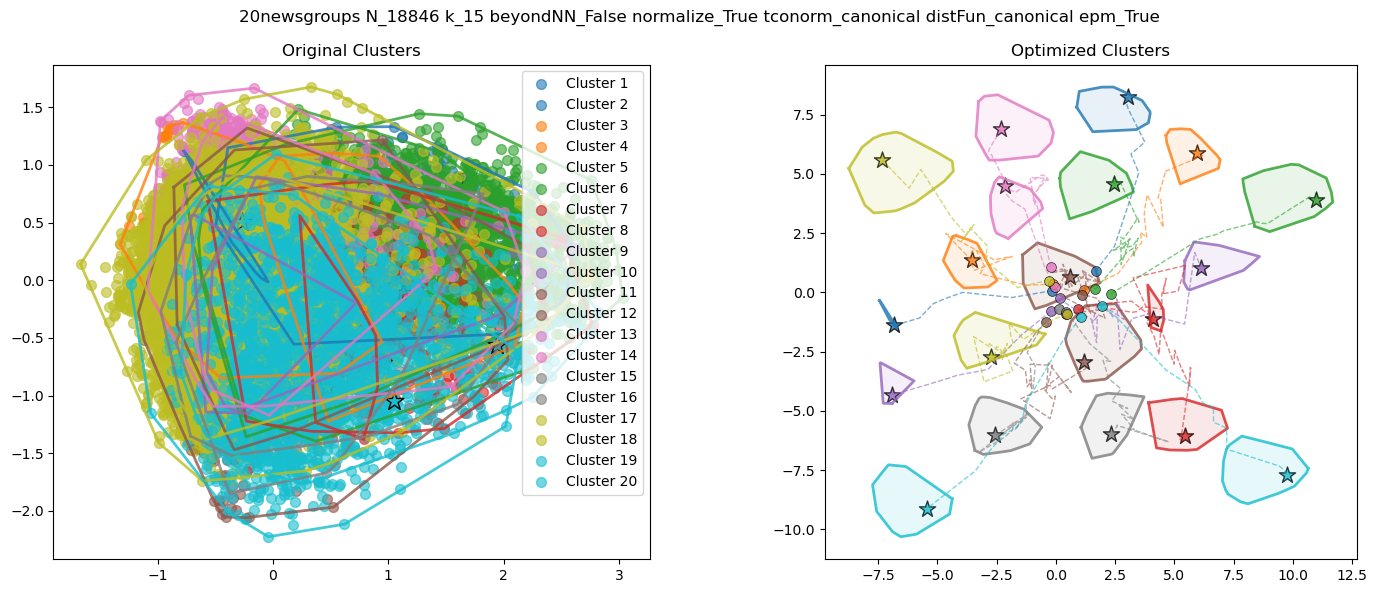

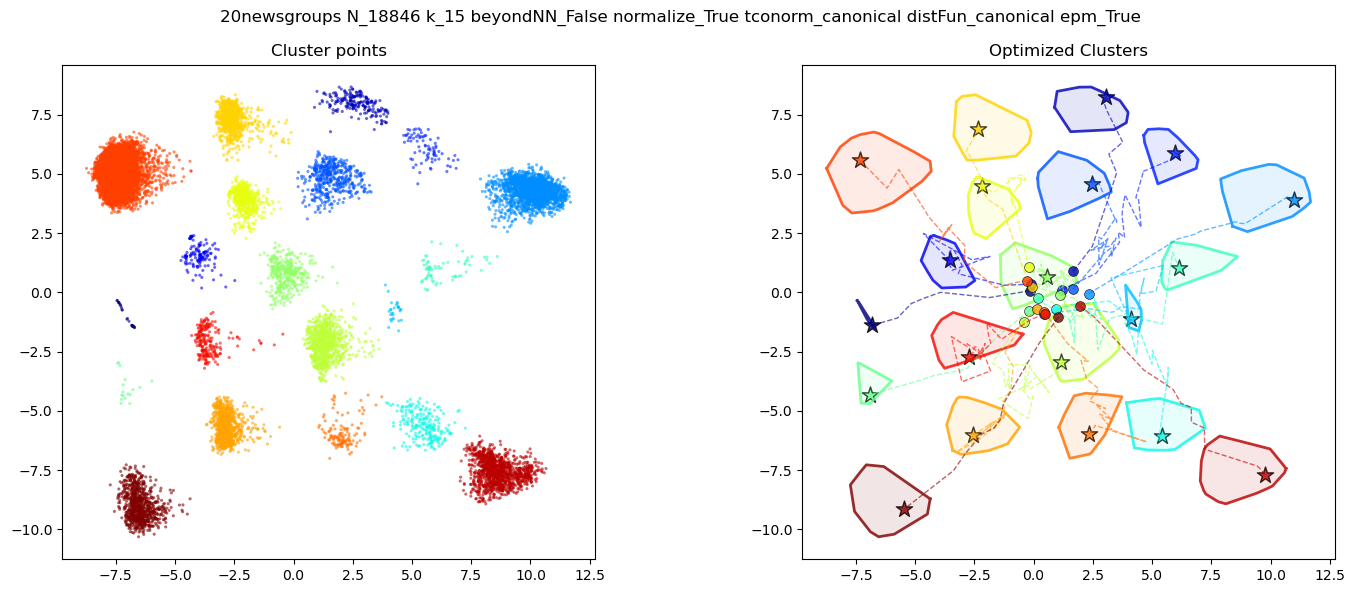

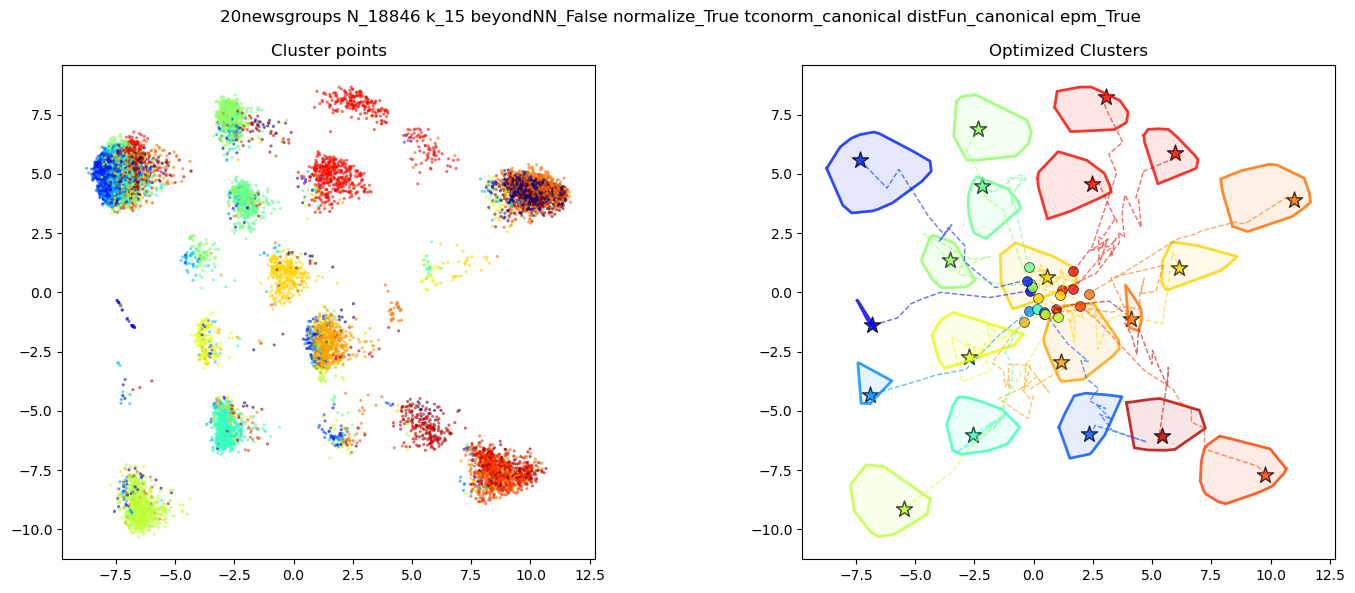

In [36]:
plot_isumap_cluster(optimizer_model, medoid_paths, title, labels=reordered_labels_split_into_clusters, enable_grid=False, plot_path=PLOT_PATH_20newsgroup)

In [4]:
import umap

In [5]:
%%time
embedding = umap.UMAP(n_components=2, metric='hellinger').fit(word_doc_matrix)

CPU times: user 10min, sys: 2min 16s, total: 12min 17s
Wall time: 1min 24s


In [6]:
newsgroup_umapEmb = embedding.embedding_
save_object(newsgroup_umapEmb, "newsgroup_umapEmb.pkl")

In [4]:
newsgroup_umapEmb = load_object("newsgroup_umapEmb.pkl")

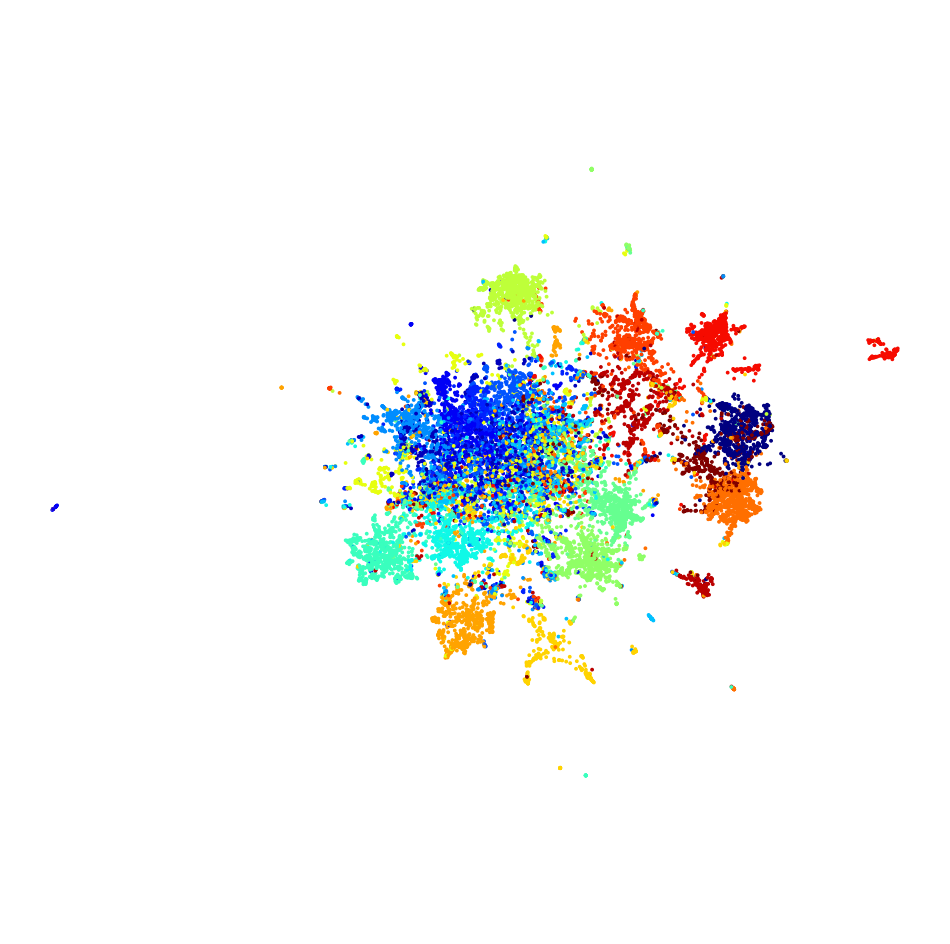

In [33]:
plot_data(newsgroup_umapEmb, targets,title="", display=True, save=True, grid=False, axis=False)

In [8]:
from sklearn.manifold import TSNE

In [15]:
# from sklearn.manifold import MDS

# # Step 1: Get MDS embedding as initialization
# mds = MDS(
#     n_components=2,
#     dissimilarity='precomputed',
#     metric=True,
#     random_state=42
# )

In [ ]:
# %%time
# mds_embedding = mds.fit_transform(hellinger_dists)
# takes very very long

In [17]:
from dimension_reduction_schemes import classical_multidimensional_scaling

In [18]:
%%time
mds_embedding = classical_multidimensional_scaling(hellinger_dists,2,True)


Performing classical MDS...

classical MDS: 38.76 sec
CPU times: user 57.1 s, sys: 21.2 s, total: 1min 18s
Wall time: 39 s


In [19]:

# Step 2: Use MDS embedding to initialize t-SNE
tsne = TSNE(
    n_components=2,
    metric='precomputed',
    init=mds_embedding,        # Initialize with MDS results
    random_state=42,
    perplexity=30,
    n_iter=1000
)

In [20]:
%%time
tsne_embedding = tsne.fit_transform(hellinger_dists)

CPU times: user 1h 6min 30s, sys: 2min 52s, total: 1h 9min 22s
Wall time: 1min 14s


In [21]:
save_object(tsne_embedding, "tsne_embedding_with_cMDS_init.pkl")

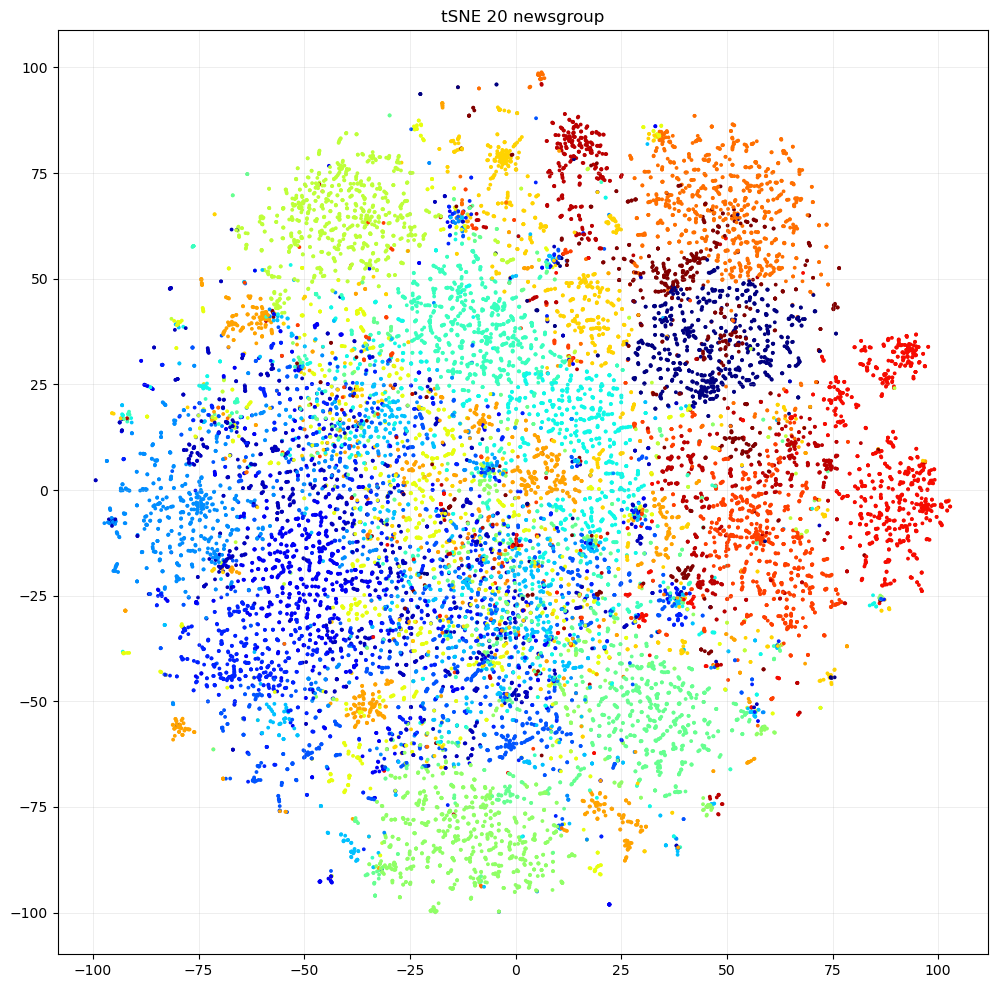

In [22]:
plot_data(tsne_embedding, targets,title="tSNE 20 newsgroup", display=True, save=True, grid=True, axis=True)

In [23]:
tsne2 = TSNE(
    n_components=2,          # 2D embedding
    metric='precomputed',    # Use precomputed distances
    init="random",  
    random_state=42,
    perplexity=30,          # Adjust based on your data size
    n_iter=500
)

In [27]:
%%time
tsne_results2 = tsne2.fit_transform(hellinger_dists)

CPU times: user 36min 37s, sys: 1min 18s, total: 37min 56s
Wall time: 45 s


In [28]:
save_object(tsne_results2, "tsne_embedding_with_random_init.pkl")

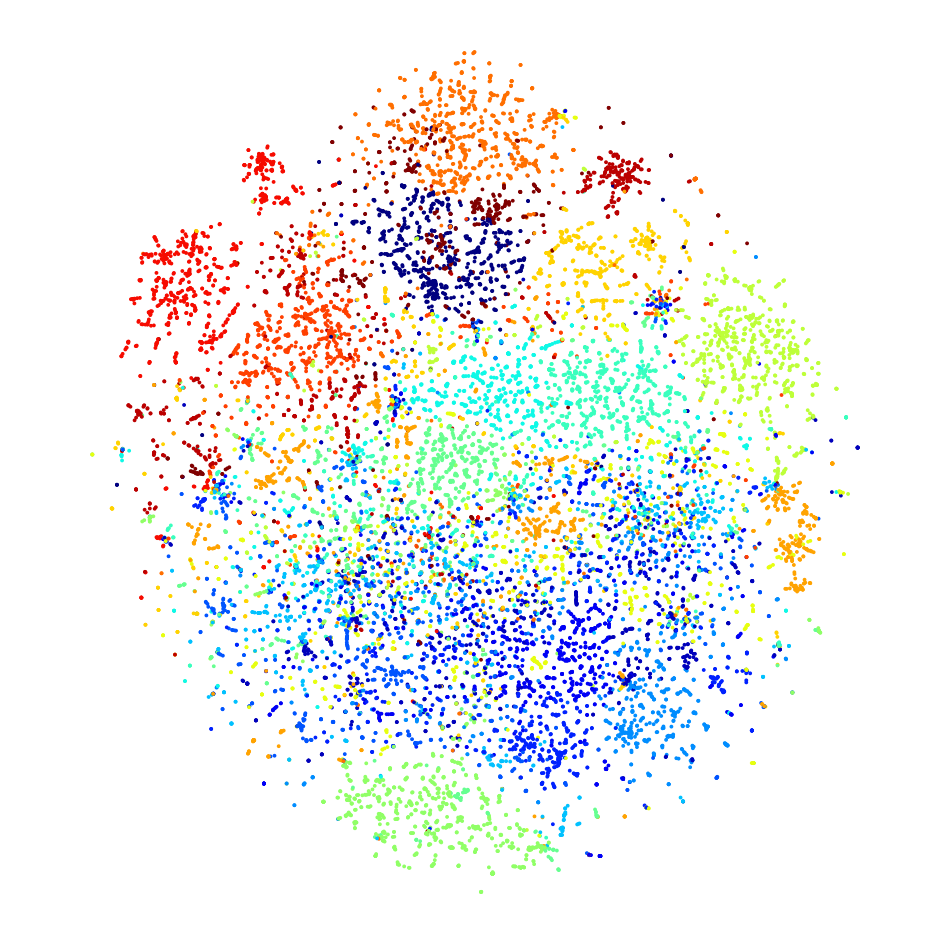

In [32]:
plot_data(tsne_results2, targets,title="", display=True, save=True, grid=False, axis=False)